In [1]:
import os, sys, re
from functools import partial
from collections import Counter

import pylab
import pandas as pd
import numpy as np
import seaborn as sns

from pylab import rcParams
from IPython.display import HTML

from bubbleplot import bubble_plot, script_bubble_plot, font0

sys.path.insert(1, os.path.join(sys.path[0], '..', '..'))

import database
from database.groups import YES, NO
from snowballing.operations import load_work, load_citations, reload
from snowballing.approaches import get_approaches, name, wlatex_name, wcitea
reload()

name = lambda x: x.display.replace("  ", "")

all_approaches = get_approaches()
script = [(a, m) for a, m in all_approaches if not m["binary"]]
binary = [(a, m) for a, m in all_approaches if m["binary"]]
len(script)

27

In [2]:
%matplotlib notebook
bubble_plot = partial(bubble_plot, script, binary)
script_bubble_plot = partial(script_bubble_plot, script)
rcParams['figure.figsize'] = 16, 8
sns.set(style='ticks', palette='BuGn') #Set2

Memory


<IPython.core.display.Javascript object>


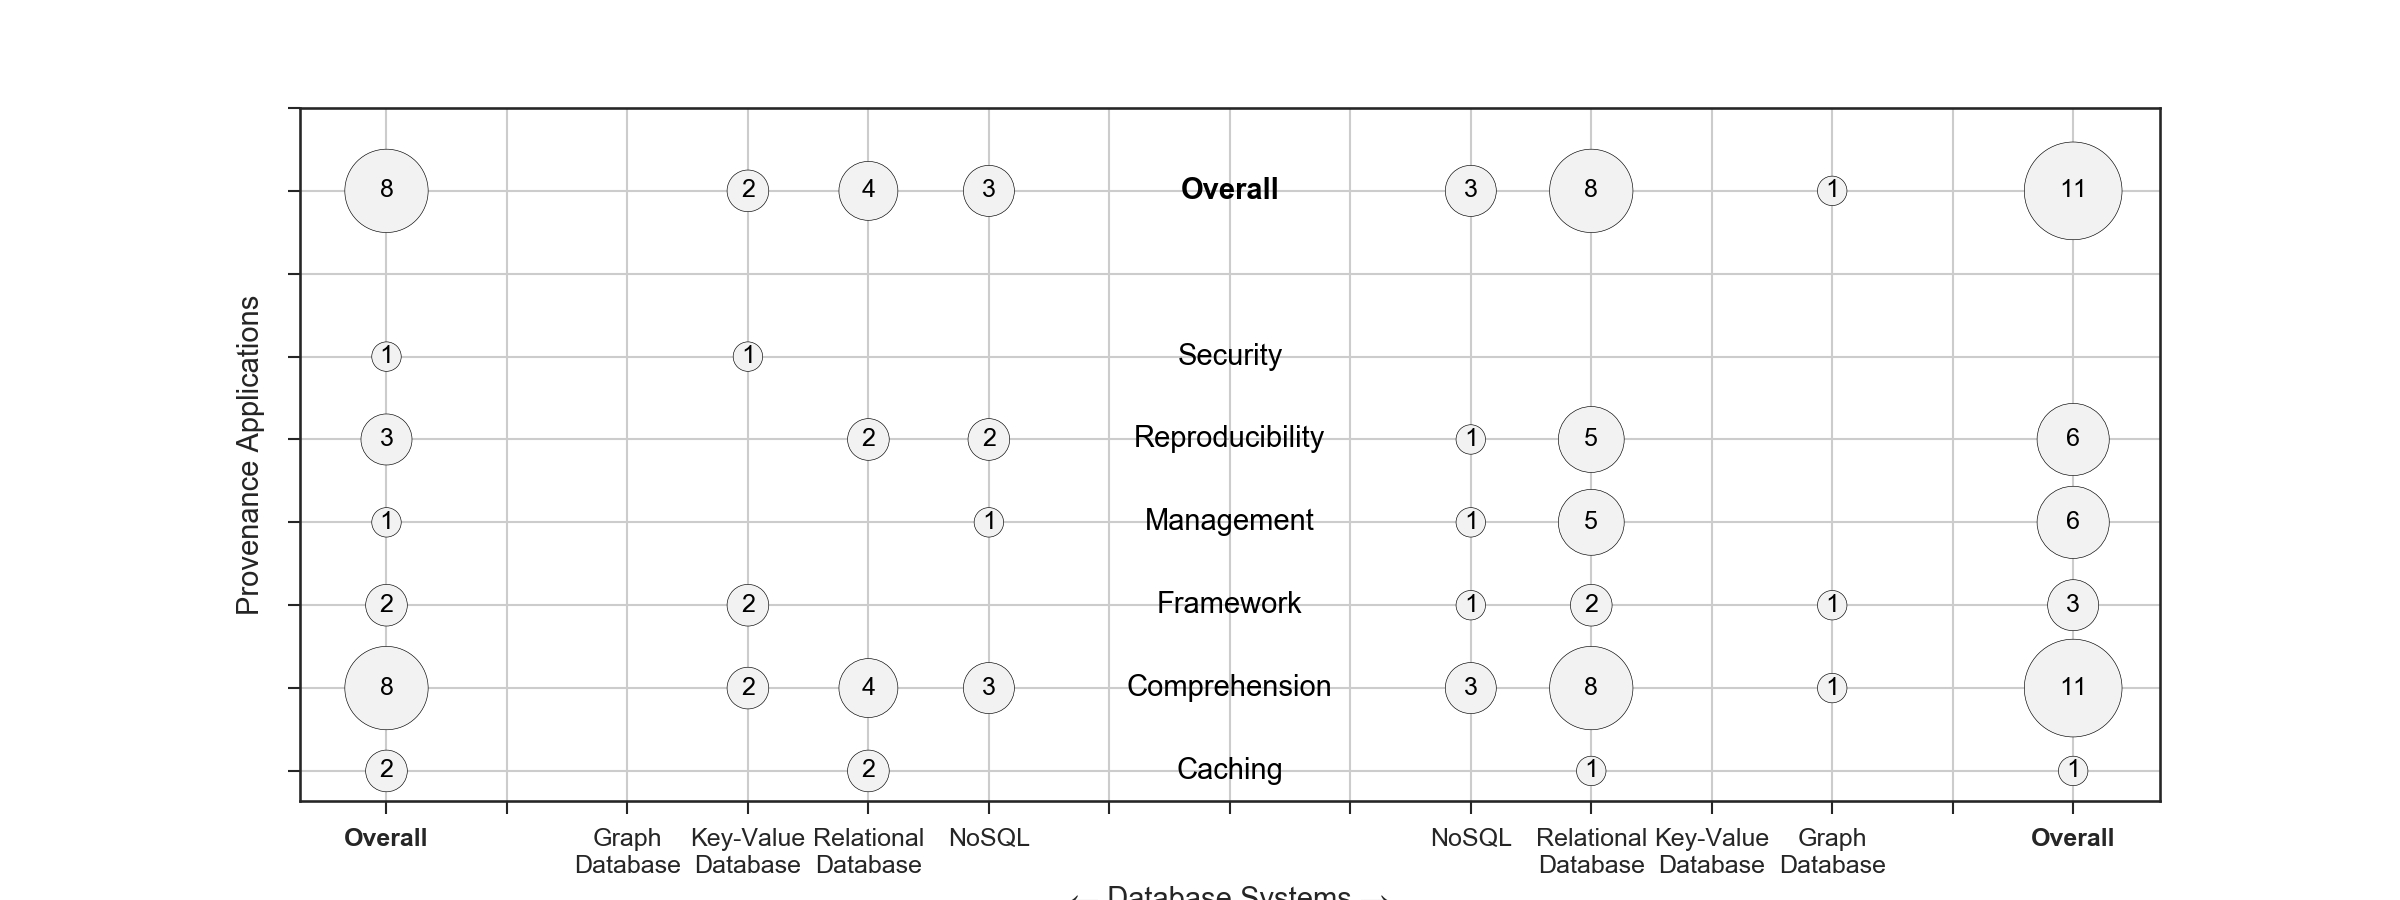

In [3]:
from database.groups import CACHE, COMPREHENSION, FRAMEWORK, MANAGEMENT, REPRODUCIBILITY, SECURITY
from database.groups import NOSQL, SHADOW_FILES, LOG, GRAPH_FILE, RELATIONAL_DB
from database.groups import FILE_SYSTEM, PACKAGE, LOGIC_FILE, INTEROPERABLE, PROPRIETARY
from database.groups import SOURCE, KEY_VALUE_DB, REPOSITORY, GRAPH_DB, VCS, FILE
from database.groups import CONTENT_DATABASE

columns = [CACHE, COMPREHENSION, FRAMEWORK, MANAGEMENT, REPRODUCIBILITY, SECURITY, "", "Overall"]
rows = [NOSQL, RELATIONAL_DB, KEY_VALUE_DB, GRAPH_DB, "", "Overall"]

line_break = lambda x: '\n'.join(x.split())
rows = [line_break(x if isinstance(x, str) else x.value) for x in rows]

categories = {
    NOSQL: 'Database',
    SHADOW_FILES: 'File',
    CONTENT_DATABASE: 'File',
    LOG: 'Log',
    GRAPH_FILE: 'File',
    FILE: 'File',
    RELATIONAL_DB: 'Database',
    FILE_SYSTEM: 'File System',
    PACKAGE: 'Package',
    LOGIC_FILE: 'File',
    INTEROPERABLE: 'File',
    SOURCE: 'File',
    PROPRIETARY: 'File',
    KEY_VALUE_DB: 'Database',
    REPOSITORY: 'Repository',
    GRAPH_DB: 'Database',
    VCS: 'Repository',
}

def process(approach, meta, add):
    for storage in meta["storage"]:
        if storage in categories and categories[storage] == 'Database':
            for goal in meta["supports"]:
                add(goal, line_break(storage.value), approach)
                add(goal, "Overall", approach)
            add("Overall", line_break(storage.value), approach)
            add("Overall", "Overall", approach)
        elif storage not in categories:
            print(storage)
   


rcParams['figure.figsize'] = 16, 6
bubble_plot(rows, columns, process, rate=200, label_y=-4, axis_x="← Database Systems →")[0].show()

Memory


<IPython.core.display.Javascript object>


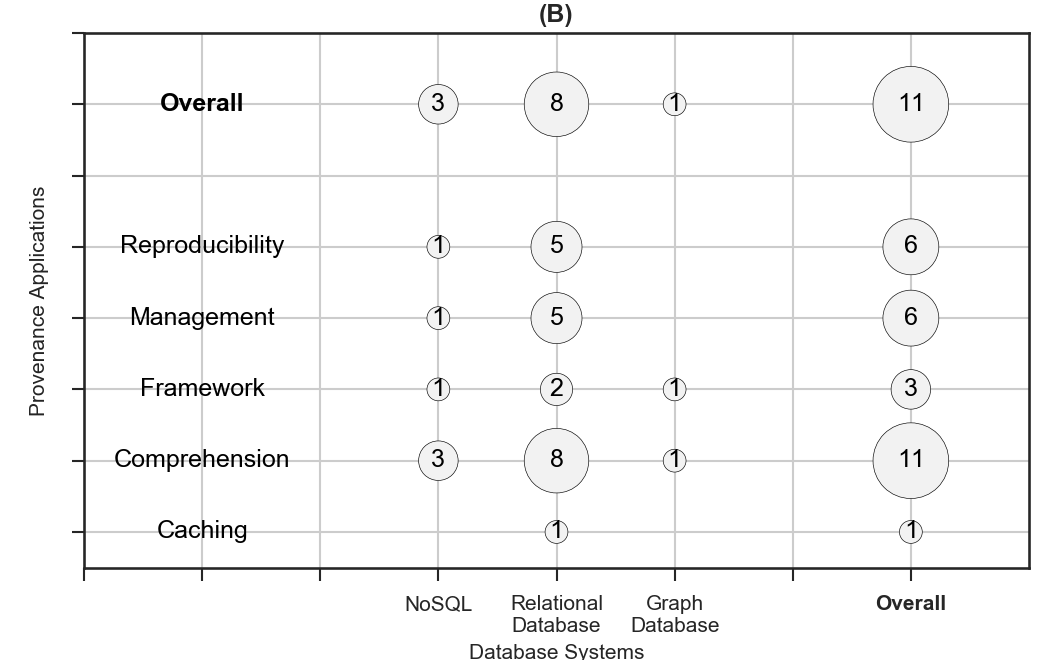

['NoSQL', 'Relational\nDatabase', 'Graph\nDatabase', '', 'Overall']

In [4]:
scolumns = [CACHE, COMPREHENSION, FRAMEWORK, MANAGEMENT, REPRODUCIBILITY, "", "Overall"]

srows = [NOSQL, RELATIONAL_DB, GRAPH_DB, "", "Overall"]
srows = [line_break(x if isinstance(x, str) else x.value) for x in srows]
rcParams['figure.figsize'] = 7, 4.4
plt, groups = script_bubble_plot(srows, scolumns, process, label_y=-5, rate=120, xticksize=10, yticksize=12, axissize=10, axis_x="Database Systems", )
plt.subplots_adjust(left=0.08, right=0.98, top=0.95, bottom=0.14)
pylab.ylim([-1, 14])
pylab.text(3, 14.5, '(B)',
        horizontalalignment='center',
        verticalalignment='center',
        fontproperties=font0)
plt.show()
#plt.savefig("../../../csur/figs/database_x_goals.pdf")
srows